# question-1:
Step#1 Get 1-day trading data with i minute interval for Therma Bright Inc. THRM

In [1]:
import pandas as pd
import mplfinance as mpf
import numpy as np

day1Minute = pd.read_csv('THRM_1day_minute_2020.csv', index_col=9, parse_dates=True)

plotData = day1Minute.loc[:, ['open', 'high', 'low', 'close', 'volume']]

plotData.index.name = 'Date'
plotData.shape
plotData.head(10)

,open,high,low,close,volume
Date,,,,,
2020-10-01 09:30:00,41.150,41.15,41.150,41.15,1332
2020-10-01 09:35:00,41.570,41.57,41.570,41.57,100
2020-10-01 09:38:00,41.660,41.66,41.660,41.66,143
2020-10-01 09:41:00,41.440,41.44,41.440,41.44,534
2020-10-01 09:44:00,41.310,41.31,41.310,41.31,1363
2020-10-01 09:48:00,41.300,41.30,41.300,41.30,311
2020-10-01 09:49:00,41.295,41.46,41.295,41.46,400
2020-10-01 09:50:00,41.380,41.38,41.330,41.36,928
2020-10-01 09:51:00,41.350,41.35,41.350,41.35,400


Question-1: 
   Step#2: Plot candle stick for the 1-day data above

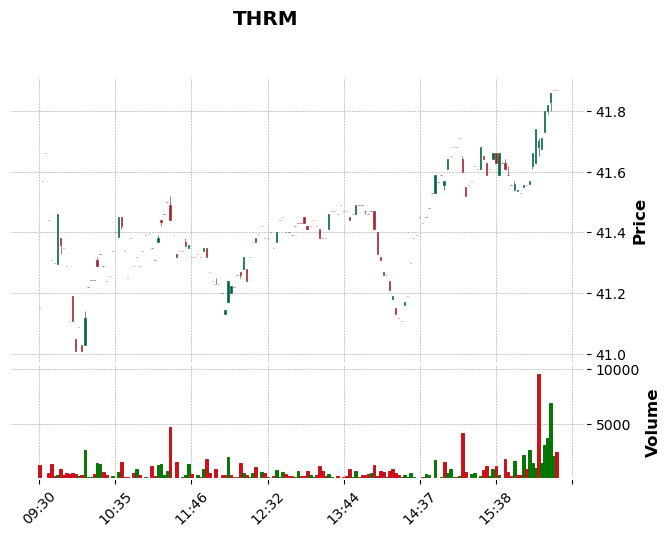

In [2]:
title_text = day1Minute['symbol'][1]
mpf.plot(plotData, title = title_text, type='candle', volume=True, style='charles')

question-1: 
Step#3 calcualte VWAP

In [3]:
plotData['vwap'] = (np.cumsum(plotData.close * plotData.volume) / np.cumsum(plotData.volume))
plotData.head(5)

,open,high,low,close,volume,vwap
Date,,,,,,
2020-10-01 09:30:00,41.15,41.15,41.15,41.15,1332,41.150000
2020-10-01 09:35:00,41.57,41.57,41.57,41.57,100,41.179330
2020-10-01 09:38:00,41.66,41.66,41.66,41.66,143,41.222971
2020-10-01 09:41:00,41.44,41.44,41.44,41.44,534,41.277923
2020-10-01 09:44:00,41.31,41.31,41.31,41.31,1363,41.290516


question-1:
Step#4 add VWAP line to the plot

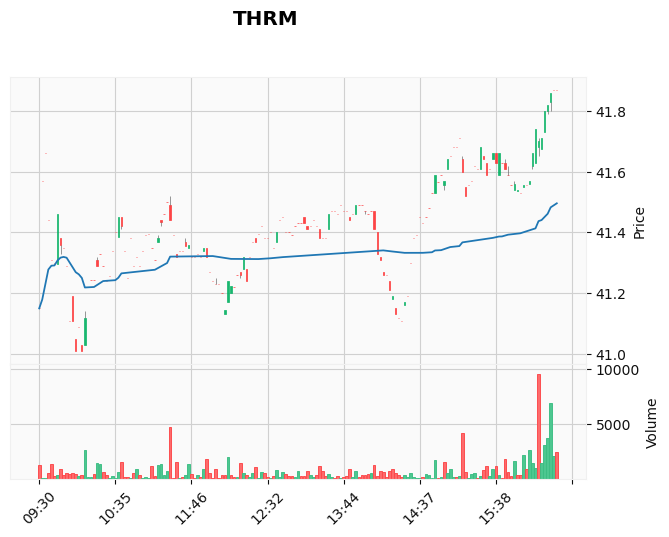

In [4]:
# create a new line
apdict = mpf.make_addplot(plotData['vwap'])

# add the new vwap line to plot
mpf.plot(plotData,title = title_text, type='candle', volume=True, style='yahoo', addplot=apdict)

---end of Question-1 ----------

# Question-2:
   Get Daily data for THRM from 2018-01-01 to 2020-12-31
   plot candle stick plot

In [5]:
daily = pd.read_csv('THRM_daily_2018-20020.csv', index_col=9, parse_dates=True)

plotData = daily.loc[:, ['open', 'high', 'low', 'close', 'volume']]

plotData.index.name = 'Date'
plotData.shape
plotData.head(5)

,open,high,low,close,volume
Date,,,,,
2018-01-01 19:00:00,31.85,32.20,31.70,32.05,159474
2018-01-02 19:00:00,32.00,32.70,31.80,32.50,174155
2018-01-03 19:00:00,32.75,33.60,32.70,33.50,119940
2018-01-04 19:00:00,32.45,32.90,31.60,31.80,377162
2018-01-07 19:00:00,31.65,32.75,31.45,32.30,227986


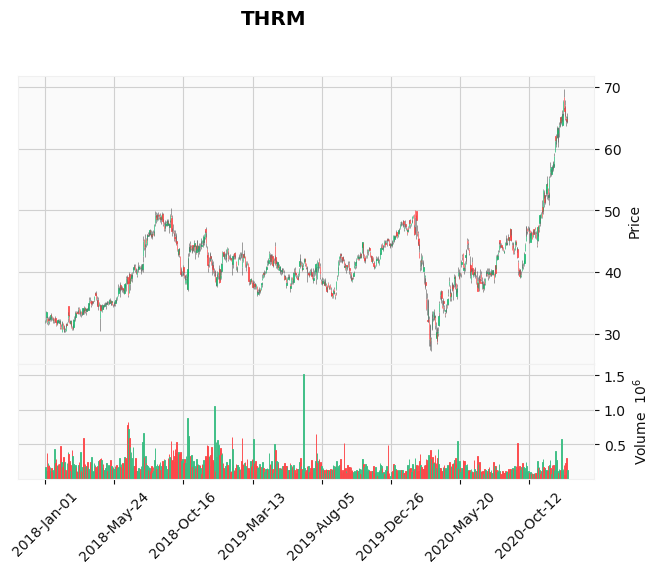

In [6]:
title_text = daily['symbol'][1]
mpf.plot(plotData, title = title_text, type='candle', volume=True, style='yahoo')

#### add 30-day and 100-day exponential moving average

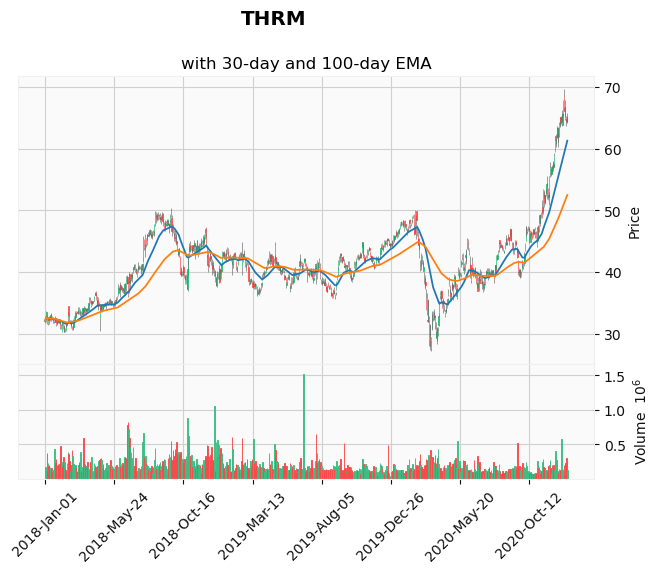

In [7]:
plotData['EMA-30'] = plotData['close'].ewm(span=30).mean()
plotData['EMA-100'] = plotData['close'].ewm(span=100).mean()
apds = [ mpf.make_addplot(plotData['EMA-30'], title="with 30-day and 100-day EMA"),
         mpf.make_addplot(plotData['EMA-100'])
        ]
mpf.plot(plotData,title = title_text, type='candle', volume=True, style='yahoo', addplot=apds)

# Question-3
(1) Calculate Daily Log return

In [36]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

log_return = pd.DataFrame()
log_return['Daily_Return_Log'] = np.log(plotData['close']/plotData['close'].shift(1)).iloc[1:]
log_return.head(10)

,Daily_Return_Log
Date,
2018-01-02 19:00:00,0.013943
2018-01-03 19:00:00,0.030305
2018-01-04 19:00:00,-0.052079
2018-01-07 19:00:00,0.015601
2018-01-08 19:00:00,-0.001549
2018-01-09 19:00:00,-0.004662
2018-01-10 19:00:00,0.004662
2018-01-11 19:00:00,0.021473
2018-01-15 19:00:00,-0.010679


array([[<AxesSubplot:title={'center':'Daily_Return_Log'}>]], dtype=object)

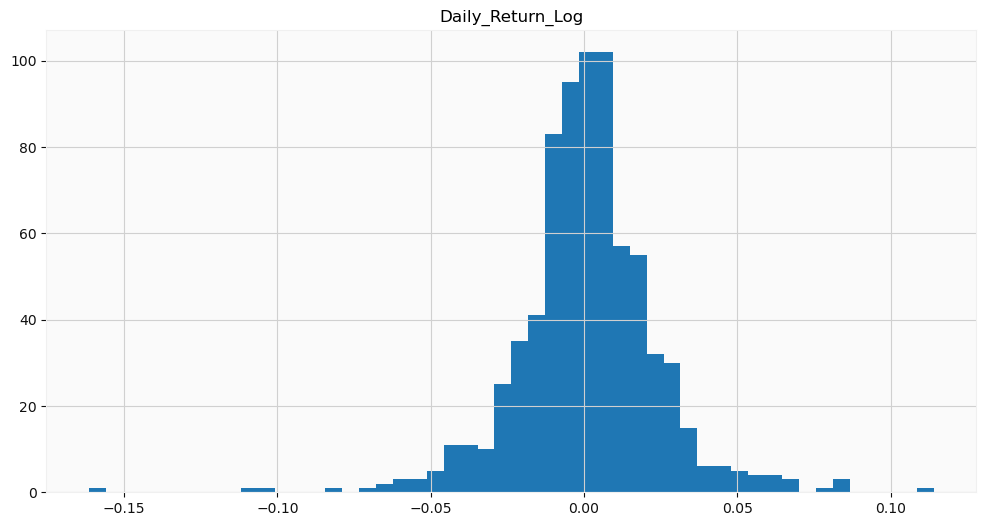

In [33]:
# show the histogram 
log_return.hist(bins=50, figsize = (12,6))

2) conduct the hypothesis test to check of the disctribution of daily return is normal

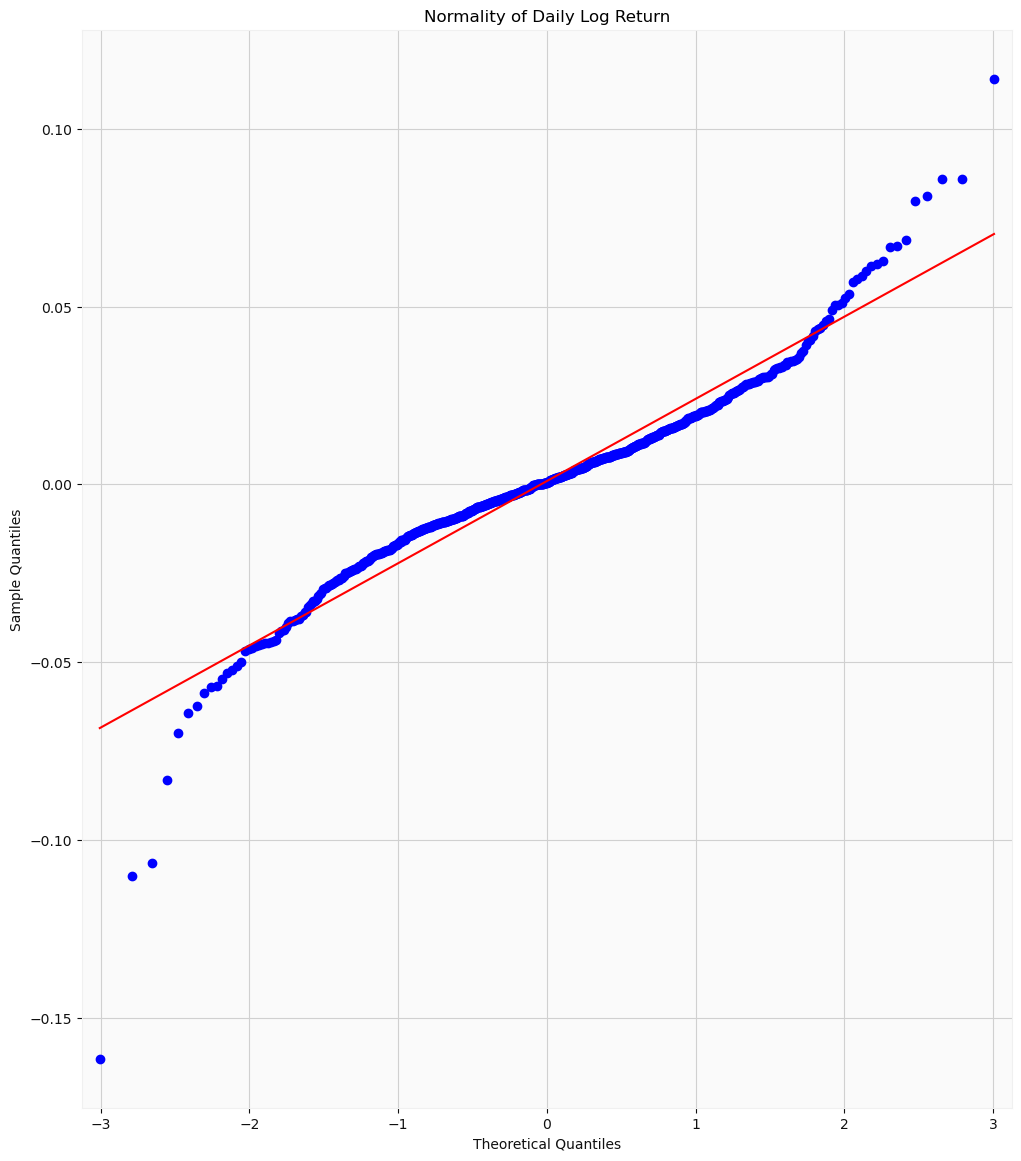

In [42]:
# check Assumptions of Normality

fix, axes = plt.subplots(1, 1, figsize=(12, 14))
qqplot(log_return['Daily_Return_Log'].dropna(), line='s', ax=axes)
axes.set_title("Normality of Daily Log Return")
plt.show()

In [52]:
# calculate the normality 
from scipy import stats

testResult = stats.normaltest(log_return['Daily_Return_Log'])
print("p value = {}".format(testResult[1]))

p = testResult[1]

# let Alpha = 0.01
Alpha = 0.01

if p < Alpha:
  print("null hypothesis rejected, significant difference between the data-sets")

p value = 6.1865490162681274e-27
null hypothesis rejected, significant difference between the data-sets


# Question-4

1) calculate daily returns for each 10 stocks

In [120]:
import pandas as pd
import mplfinance as mpf
import numpy as np

dailyCloseFile = pd.read_csv('Ten_stocks_close_price.csv',index_col=0, parse_dates=True)

sp500CloseFile = pd.read_csv('sp500daily.csv',index_col=0, parse_dates=True)

dailyLogReturn = pd.DataFrame()
sp500LogReturn = pd.DataFrame()

for clnm_name in dailyCloseFile.columns[1:]:
        dailyLogReturn[clnm_name] = np.log(dailyCloseFile[clnm_name]/dailyCloseFile[clnm_name].shift(1))

dailyLogReturn = dailyLogReturn.iloc[1:]

sp500LogReturn['close'] = np.log(sp500CloseFile['close']/sp500CloseFile['close'].shift(1)).iloc[1:]

dailyLogReturn.index.name = 'Date'

sp500LogReturn.index.name = 'Date'

print(dailyLogReturn.head(10))

print(sp500LogReturn.head(10))

                          AAL      DISH       DXC      FANG      FTNT  \
Date                                                                    
2020-06-01 20:00:00  0.009852 -0.005532  0.090618  0.042093 -0.005612   
2020-06-02 20:00:00  0.054630  0.044599  0.099464  0.042286 -0.007321   
2020-06-03 20:00:00  0.344278  0.023592 -0.014105  0.002100 -0.023437   
2020-06-04 20:00:00  0.106018  0.030615  0.022473  0.090762  0.006427   
2020-06-07 20:00:00  0.088490  0.041023  0.083115  0.136066 -0.021368   
2020-06-08 20:00:00 -0.090644 -0.056213 -0.075367 -0.103839 -0.011630   
2020-06-09 20:00:00 -0.086081 -0.056858 -0.068442 -0.072084  0.012575   
2020-06-10 20:00:00 -0.168551 -0.057900 -0.137080 -0.123079 -0.043887   
2020-06-11 20:00:00  0.151963  0.038817  0.096725  0.056958 -0.010608   
2020-06-14 20:00:00 -0.002392  0.040161  0.007348  0.024402  0.041846   

                          NOW      PAYC      TWTR      ZBRA  
Date                                                         

2) Run PCA on calculated daily Log Returns above


In [122]:
from sklearn.decomposition import PCA
pca = PCA()
#pca.fit(dailyLogReturn.iloc[:, 1:])
pca.fit(dailyLogReturn)
tenStock=dailyLogReturn
pca.components_

array([[-0.62377336, -0.23684073, -0.38829982, -0.5792894 , -0.0438716 ,
        -0.02760094, -0.14851723, -0.15015755, -0.14549612],
       [ 0.33754553, -0.04056058, -0.09968064,  0.07984055, -0.43961677,
        -0.40864475, -0.37770888, -0.52997012, -0.29038139],
       [ 0.68666883, -0.03131243, -0.25336017, -0.62829897,  0.07340633,
         0.13967967,  0.07298589,  0.19228995, -0.03678594],
       [-0.09464015,  0.16089319,  0.5553798 , -0.29911273, -0.23402454,
        -0.20673076, -0.44791664,  0.50806179, -0.10478683],
       [-0.02684404,  0.22277231,  0.56970492, -0.38339607,  0.01779728,
         0.2245882 ,  0.22437615, -0.60483028,  0.10571054],
       [ 0.08531154, -0.91107431,  0.36000458,  0.02416114, -0.02392114,
         0.01602202,  0.14172105,  0.0239226 , -0.10484473],
       [ 0.08346979, -0.09355813,  0.0694305 ,  0.0025982 ,  0.77971891,
        -0.13132307, -0.55041443, -0.18052094,  0.13675217],
       [ 0.01460437, -0.12091023, -0.05714166, -0.118896  , -0

3) Plot First Principal component and daily return of SP500 in one figure

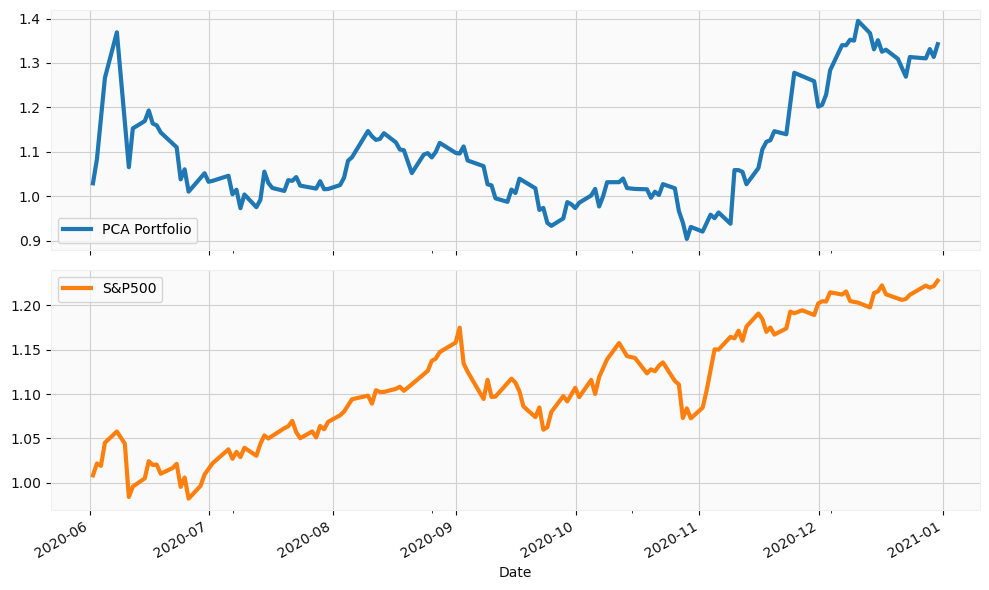

In [125]:
# my first principal component
pc1 = pd.Series(index=tenStock.columns, data=pca.components_[0])
weights = abs(pc1)/sum(abs(pc1))
myPCA = (weights*tenStock).sum(1)

# include SP500 daily log return in the same figure
myPlot = pd.concat([myPCA,sp500LogReturn], 1)
myPlot.columns = ["PCA Portfolio", "S&P500"]

myPlot.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.show()